In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('Advertising.csv')

In [5]:
dataset.shape

(200, 5)

In [6]:
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
dataset.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [20]:
dataset.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [21]:
duplicated = dataset[dataset.duplicated()]
duplicated.shape

(0, 5)

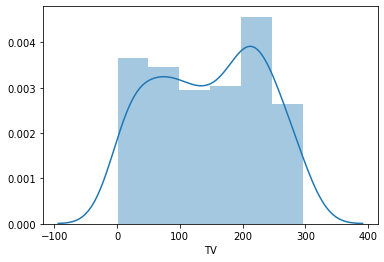

In [15]:
sns.distplot(dataset['TV'])

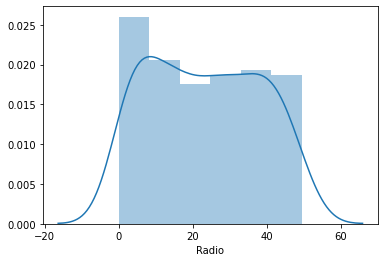

In [16]:
sns.distplot(dataset['Radio'])

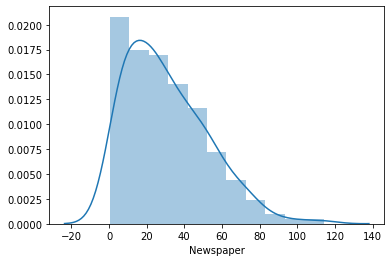

In [17]:
sns.distplot(dataset['Newspaper'])

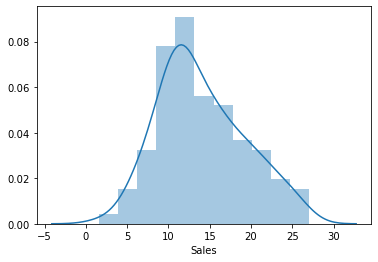

In [18]:
sns.distplot(dataset['Sales'])

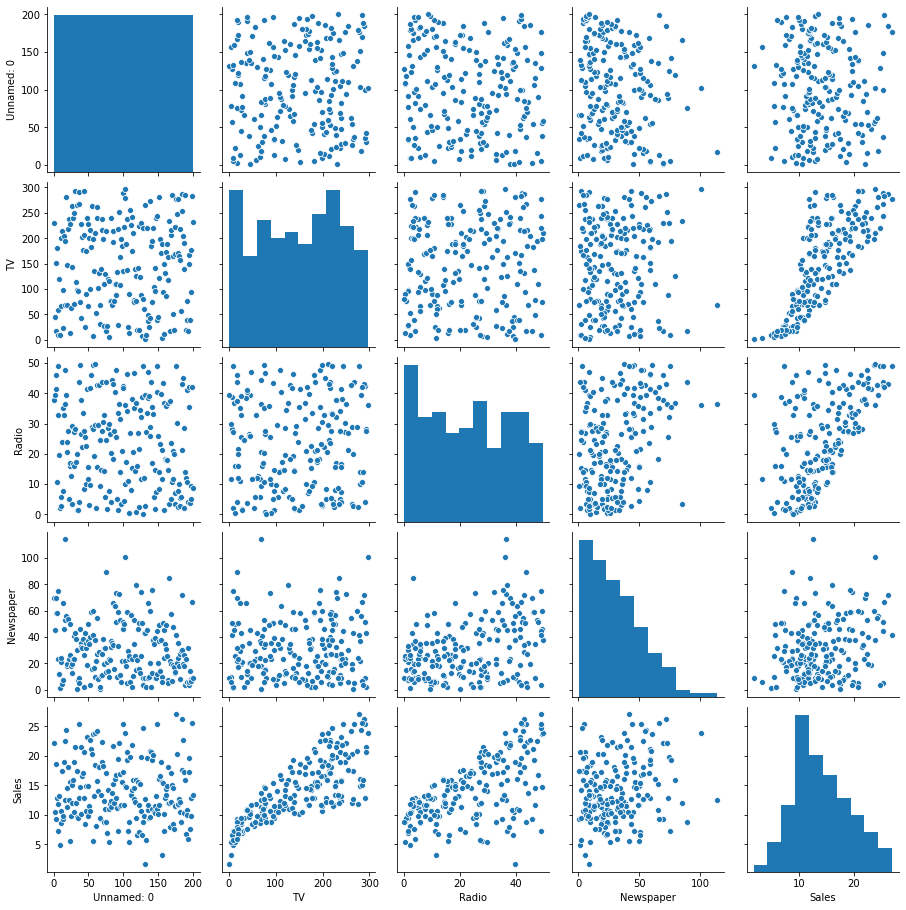

In [19]:
sns.pairplot(dataset)

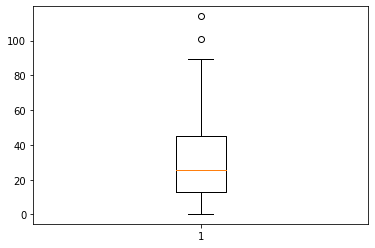

In [46]:
plt.boxplot(dataset['Newspaper'])
plt.show()

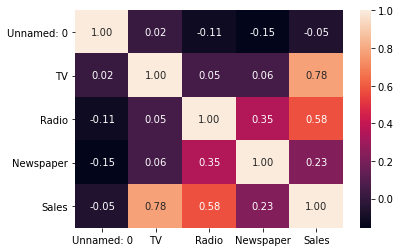

In [29]:
sns.heatmap(dataset.corr(), annot=True, fmt='.2f')
plt.show()

In [36]:
from collections import Counter
def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c], 25)
        #2nd quartile
        Q2 = np.percentile(df[c], 50)
        #3rd quartile
        Q3 = np.percentile(df[c], 75)
        #IQR
        IQR = Q3 - Q1
        #outlier step
        outlier_step = IQR * 1.5
        #detect outliers and their indices
        outlier_list_col = df[(df[c]< Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [37]:
dataset.loc[detect_outliers(dataset, ['TV','Radio', 'Newspaper'])]

,Unnamed: 0,TV,Radio,Newspaper,Sales


In [39]:
X = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.046353
Radio,0.187757
Newspaper,-0.005778


In [52]:
y_pred = regressor.predict(X_train)
df = pd.DataFrame({'Actual':y_train, 'Predicted':y_pred})
df

,Actual,Predicted
5,7.2,12.182226
154,15.6,15.642800
173,11.7,12.095898
187,17.3,17.172446
108,5.3,3.565409
...,...,...
145,10.3,9.839011
87,16.0,15.419993
192,5.9,4.415487
131,12.7,15.619761


Text(0, 0.5, 'Residuals')

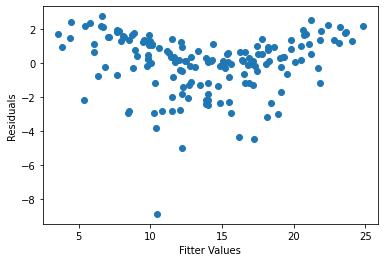

In [53]:
#Validating OLS Predictions
plt.scatter(y_pred, (y_train-y_pred))
plt.xlabel('Fitter Values')
plt.ylabel('Residuals')

In [54]:
(y_train-y_pred).mean()

-9.325873406851315e-16

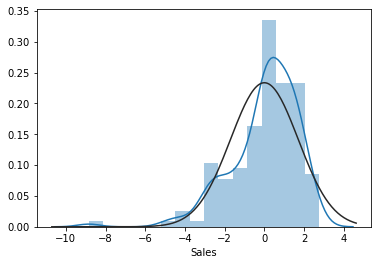

In [56]:
from scipy import stats
sns.distplot((y_train-y_pred), fit=stats.norm)
plt.show()

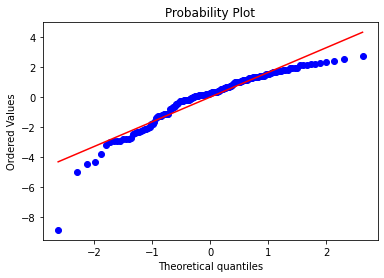

In [59]:
stats.probplot(y_train-y_pred, plot=plt)
plt.show()

In [60]:
import statsmodels.api as sm

In [61]:
X_endog = sm.add_constant(X_train)

In [62]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [63]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     441.6
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           5.51e-76
Time:                        00:29:50   Log-Likelihood:                -312.61
No. Observations:                 160   AIC:                             633.2
Df Residuals:                     156   BIC:                             645.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0310      0.357      8.487      0.000       2.326       3.736
TV             0.0464      0.002     28.804      0.000       0.043       0.050
Radio          0.1878      0.010     19.135      0.000       0.168       0.207
Newspaper     -0.0058      0.007     -0.872      0.384      -0.019       0.007
==============================================================================
Omnibus:                       55.686   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.509
Skew:                          -1.432   Prob(JB):                     5.64e-33
Kurtosis:                       6.752   Cond. No.                         446.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Model Evaluation
y_pred1 = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 1.2706044439819906
Mean Squared Error: 2.91449751348508
Root Mean Squared Error: 1.7071899465159348


In [67]:
y_train.mean()

13.880625

In [ ]:
# Removing insignificent variables (Newspaper in this case) are rebuilding the model

In [70]:
X = dataset[['TV', 'Radio']]
y = dataset['Sales']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [72]:
regressor.fit(X_train, y_train)

LinearRegression()

In [74]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Cofficient'])
coeff_df

,Cofficient
TV,0.046389
Radio,0.184767


In [76]:
y_pred = regressor.predict(X_train)
df = pd.DataFrame({'Actual':y_train, 'Predicted':y_pred})
df

,Actual,Predicted
5,7.2,12.356703
154,15.6,15.528521
173,11.7,12.041827
187,17.3,17.085835
108,5.3,3.599614
...,...,...
145,10.3,9.777496
87,16.0,15.554855
192,5.9,4.473449
131,12.7,15.756300


In [80]:
y_pred1 = regressor.predict(X_test)
df1 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred1})
df1 

,Actual,Predicted
197,12.8,12.847264
109,19.8,19.736093
101,23.8,23.374869
125,10.6,9.143413
48,14.8,16.376998
196,9.7,8.193246
29,10.5,9.149371
190,10.8,12.344314
159,12.9,12.427204
142,20.1,19.281135


In [81]:
X_endog = sm.add_constant(X_train)

res = sm.OLS(y_train, X_endog)
res.fit()

In [82]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     663.0
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           2.77e-77
Time:                        09:05:44   Log-Likelihood:                -313.00
No. Observations:                 160   AIC:                             632.0
Df Residuals:                     157   BIC:                             641.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9180      0.333      8.774      0.000       2.261       3.575
TV             0.0464      0.002     28.859      0.000       0.043       0.050
Radio          0.1848      0.009     20.110      0.000       0.167       0.203
==============================================================================
Omnibus:                       52.757   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.787
Skew:                          -1.391   Prob(JB):                     6.56e-29
Kurtosis:                       6.425   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 1.284578938587654
Mean Squared Error: 2.928719326629756
Root Mean Squared Error: 1.7113501472900734


In [84]:
# Model Evaluation on the test data
X_endog = sm.add_constant(X_test)

res = sm.OLS(y_test, X_endog)
res.fit()

In [85]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           2.32e-20
Time:                        09:09:54   Log-Likelihood:                -71.745
No. Observations:                  40   AIC:                             149.5
Df Residuals:                      37   BIC:                             154.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9171      0.640      4.560      0.000       1.621       4.213
TV             0.0436      0.003     15.737      0.000       0.038       0.049
Radio          0.2006      0.017     12.101      0.000       0.167       0.234
==============================================================================
Omnibus:                        2.863   Durbin-Watson:                   2.757
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.324
Skew:                          -0.590   Prob(JB):                        0.313
Kurtosis:                       2.944   Cond. No.                         488.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1435722276666436
Mean Squared Error: 2.2338829142022747
Root Mean Squared Error: 1.494617982697343
